# **TASK 4:**

**Description:**
This task involves performing exploratory
data analysis on a dataset.

**Responsibility:**
Create visualizations to understand the
distribution of variables, identify outliers,
and check for correlations between
variables.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/USvideos (1).csv')
data.head(10)

In [ ]:
data.info()

In [ ]:
data=data.drop_duplicates()
data.shape

In [ ]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

In [ ]:
columns_to_remove = ['thumbnail_link', 'description']
data = data.drop(columns=columns_to_remove)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB


In [ ]:
from datetime import datetime

In [ ]:
import datetime

In [ ]:
data["trending_date"] = data["trending_date"].apply(lambda x: datetime.datetime.strptime(x, '%y.%d.%m'))
data.head(3)

In [ ]:
data["publish_time"] = pd.to_datetime(data["publish_time"])
data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False


In [ ]:
data['publish_month'] = data['publish_time'].dt.month
data['publish_day'] = data['publish_time'].dt.day
data['publish_hour'] = data['publish_time'].dt.hour
data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7


In [ ]:
print(sorted(data['category_id'].unique()))

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


In [ ]:
data['category_name'] = np.nan
data.loc[data['category_id'] == 1, 'category_name'] = 'Film & Animation'
data.loc[data['category_id'] == 2, 'category_name'] = 'Autos & Vehicles'
data.loc[data['category_id'] == 10, 'category_name'] = 'Music'
data.loc[data['category_id'] == 15, 'category_name'] = 'Pets & Animals'
data.loc[data['category_id'] == 17, 'category_name'] = 'Sports'
data. loc[data['category_id'] == 19, 'category_name'] = 'Travel & Events'
data.loc[data['category_id'] == 20, 'category_name'] = 'Gaming'
data.loc[data['category_id'] == 22, 'category_name'] = 'People & Blogs'
data.loc[data['category_id'] == 23, 'category_name'] = 'Comedy'
data.loc[data['category_id'] == 24, 'category_name'] = 'Entertainment'
data.loc[data['category_id'] == 25, 'category_name'] = 'News & Politics'
data.loc[data['category_id'] == 26, 'category_name'] = 'How to & Style'
data.loc[data['category_id'] == 27, 'category_name'] = 'Education'
data.loc[data['category_id'] == 28, 'category_name'] = 'Science & Technology'
data.loc[data['category_id'] == 29, 'category_name'] = 'Nonprofits & Activism'
data.loc[data['category_id'] == 43, 'category_name'] = 'Shows'
data.loc[data['category_id'] == 52, 'category_name'] = 'Movies'

data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,11,13,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,11,12,18,Entertainment


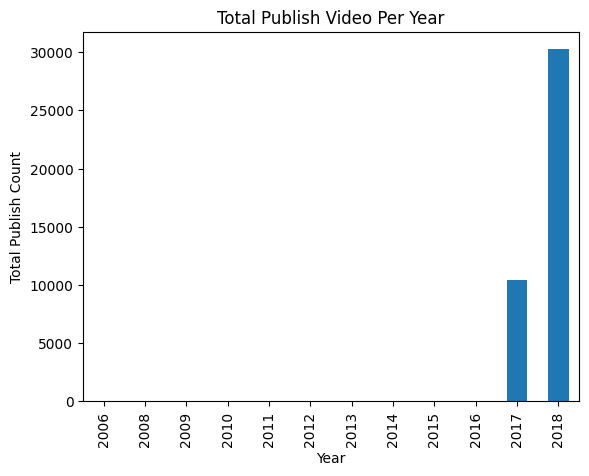

In [ ]:
data['year'] = data['publish_time'].dt.year
yearly_counts = data.groupby('year')['video_id'].count()

yearly_counts.plot(kind='bar' , xlabel='Year', ylabel='Total Publish Count', title='Total Publish Video Per Year')
plt.show()

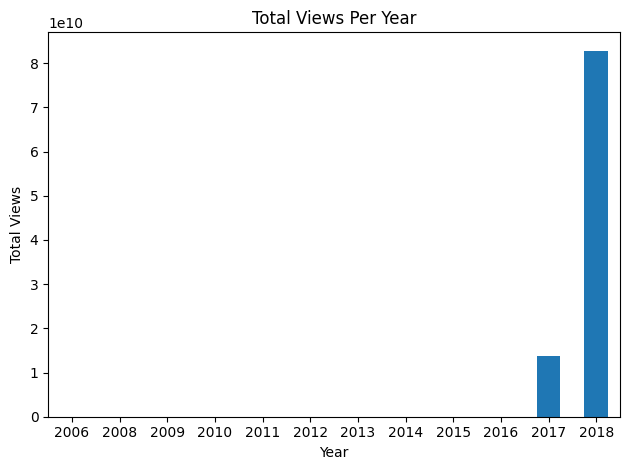

In [ ]:
yearly_views = data.groupby('year')['views'].sum()

yearly_views.plot(kind='bar', xlabel='Year', ylabel='Total Views', title='Total Views Per Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

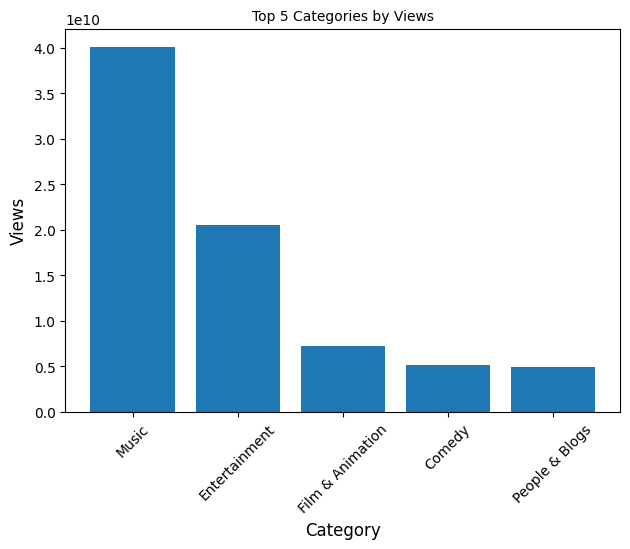

In [ ]:
category_views = data.groupby('category_name')['views'].sum().reset_index()
category_views = category_views.sort_values(by='views', ascending=False)

top_categories = category_views.sort_values(by='views', ascending=False).head(5)


plt.bar(top_categories['category_name'], top_categories['views'])
plt.xlabel('Category', fontsize =12)
plt.ylabel('Views', fontsize=12)
plt.title('Top 5 Categories by Views', fontsize=10)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


<ipython-input-47-32aae38c9828>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='rocket')


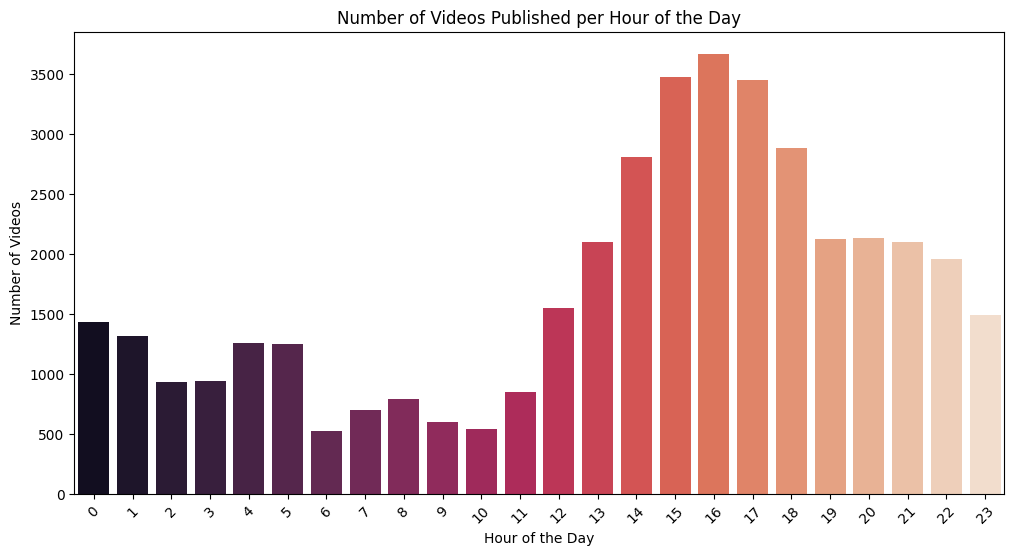

In [ ]:
videos_per_hour = data['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='rocket')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.title('Number of Videos Published per Hour of the Day')
plt.xticks(rotation=45)
plt.show()

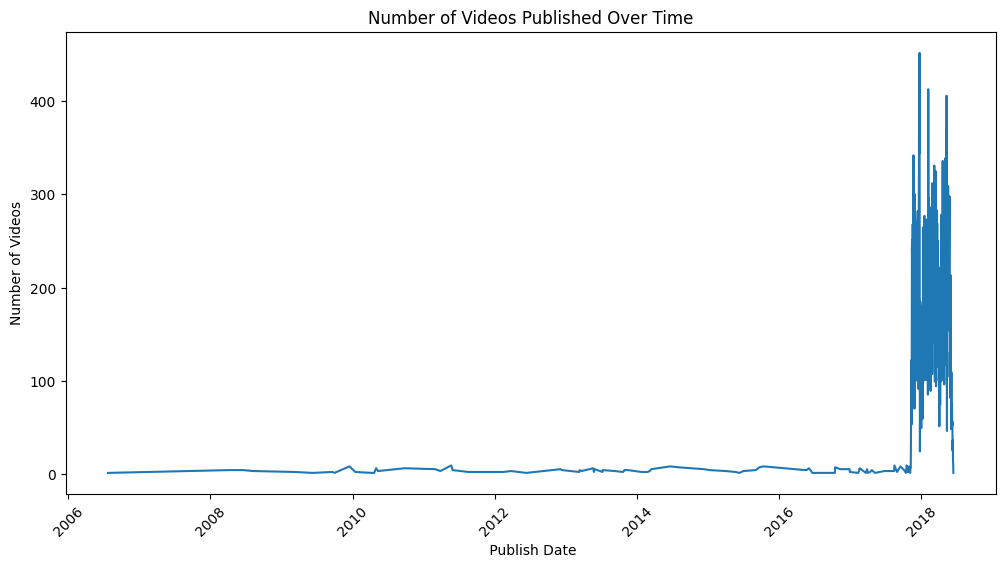

In [ ]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
video_count_by_date = data.groupby('publish_date').size()
plt.figure(figsize=(12, 6))
sns.lineplot(data= video_count_by_date)
plt.xlabel(' Publish Date')
plt.ylabel('Number of Videos')
plt.title('Number of Videos Published Over Time')
plt.xticks(rotation=45)
plt.show()

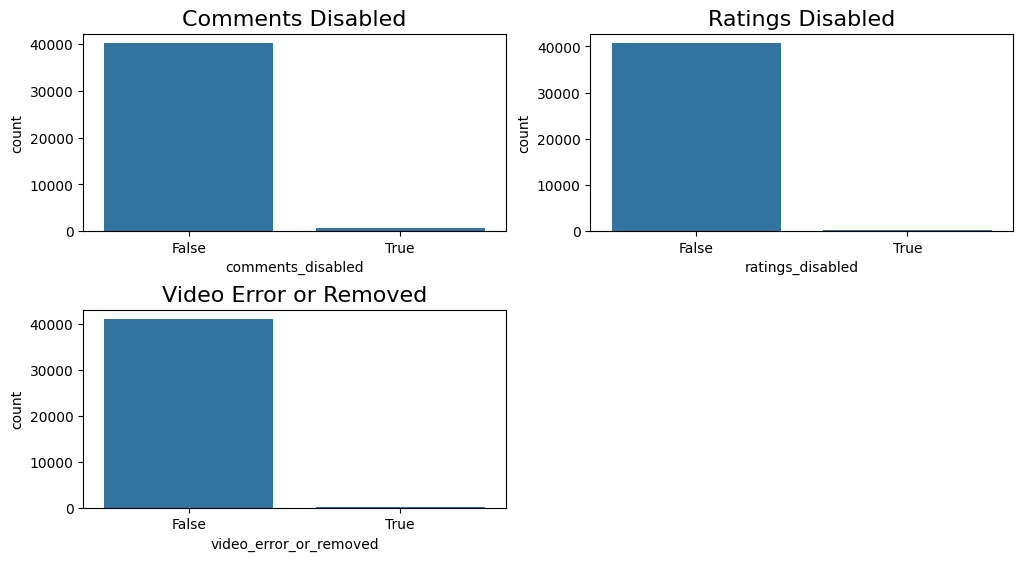

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.subplot(2, 2, 1)
g= sns.countplot(x='comments_disabled', data=data)
g.set_title('Comments Disabled',fontsize = 16)
plt.subplot(2, 2, 2)
g= sns.countplot(x='ratings_disabled', data=data)
g.set_title('Ratings Disabled',fontsize = 16)
plt.subplot(2, 2, 3)
g= sns.countplot(x='video_error_or_removed', data=data)
g.set_title('Video Error or Removed',fontsize = 16)
plt.show()

In [ ]:
corr_matrix = data['views'].corr(data['likes'])
corr_matrix


0.8491785476230508